<a href="https://colab.research.google.com/github/prathamesh122/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/ML_Regression_Yes_Bank_Closing_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction




##### **Project Type**    - Regression
##### **Contribution**    - Team
##### Team Member 1 -Pranav Rajmane
##### Team Member 2 -Prathamesh Kalambe 
##### Team Member 3 -Pavan Malvay
##### Team Member 4 -Sayali Mandhare

# **Project Summary -**

YES BANK is a well known bank in the India financial domain, it has been in news since 2018 because of fraud case, we have provided with dataset which has monthly stock prices of the bank since its inception and it includes closing price, opening price, highest price, lowest price of every month. The main objective is to predict the stocks closing price of the month by creating a machine learning regression model with best accuracy score.


# **GitHub Link -**

https://github.com/CoderPranavRaj/YesBank-StockPrice-Prediction

https://github.com/SayaliMandhare/-Capstone-Project-2-Machine-Learning--Regression-YES-BANK-Stock-Closing-Price-Prediction

https://github.com/pmal1/YES_BANK_PRICE_PREDICTION.git

# **Problem Statement**


**To determine the future price of YES BANK's stock price which is being traded on National Stock Exchange by making machine learning model of linear regression. We have to build a model which helps us to predict the future stock closing price.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Capstone-2/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
len(dataset.columns)

5

In [ ]:
len(dataset.values)

185

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
# No missing values

### What did you know about your dataset?

In this dataset, we have been provided with month wise data of Opening Price, Highest Price, Lowest Price, Closing Price.
We have total of 185 rows and 5 columns. The time period of Data is from July 2005 to November 2020.

We have no duplicate, missing or null values in this dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

We have total of 185 rows, containing Open Price, High Price, Low Price, Close Price.

The lowest price YES BANK stock price touched is 5.55

The highest price YES BANK stock price touched is 404.00

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(dataset['Date'].nunique())
print(dataset['Open'].nunique())
print(dataset['High'].nunique())
print(dataset['Low'].nunique())
print(dataset['Close'].nunique())

185
183
184
183
185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
Features = dataset[["Open",'High','Low']]
Target = dataset['Close']

In [ ]:
# Write your code to make your dataset analysis ready.
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x:datetime.strptime(x,'%b-%y')))

In [ ]:
dataset['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [ ]:
#setting Date column as index
dataset.set_index('Date',inplace=True)

In [ ]:
dataset.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

Format and data type of date feature changed into datetime.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

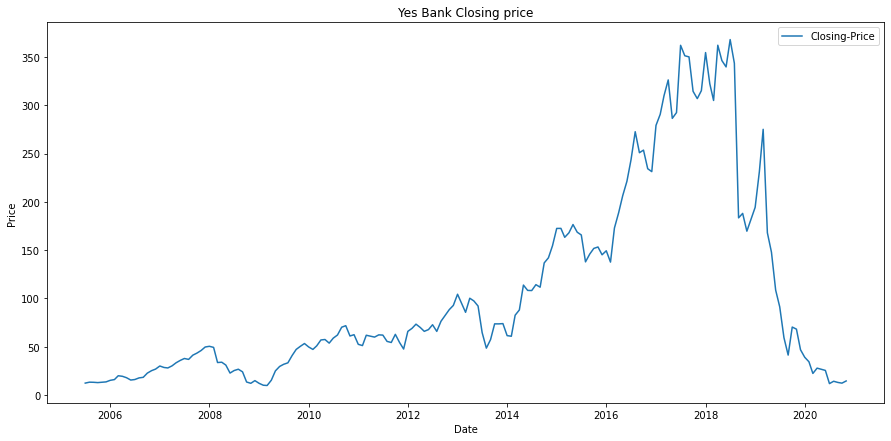

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,7))
plt.plot(dataset['Close'])
plt.legend(['Closing-Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yes Bank Closing price')
plt.show()

[link text](https://)##### 1. Why did you pick the specific chart?

This chart gives us a clear understanding and visualization of closing price from July 2005 till November 2020.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was a up trend. The price between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018.

After Rana Kapoor fraud which was done in 2018 the stock price started to fall and there was a severe down trend, in around 2020 the price reached its July 2005 rate of around 5 Rs - 10 Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in creating a positive business impact, as we can see the up trend in the stock price from July 2005 to 2018 which was a beneficial time for the investor and after Rana Kapoor fraud there was downtrend in the stock price.

#### Chart - 2

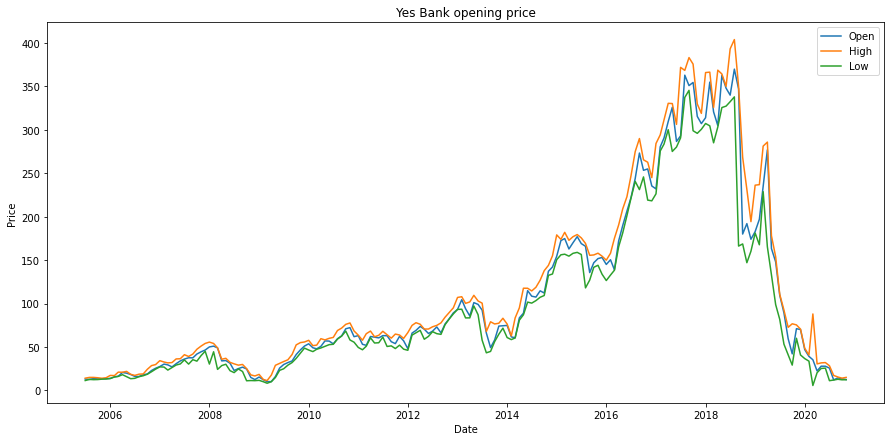

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,7))
plt.plot(dataset['Open'])
plt.plot(dataset['High'])
plt.plot(dataset['Low'])
plt.legend(['Open',"High",'Low'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Yes Bank opening price')
plt.show()

##### 1. Why did you pick the specific chart?

`This chart gives us a clear uderstanding and visualization of our independent variables open,high and low price from July 2005 till November 2020.`

##### 2. What is/are the insight(s) found from the chart?


From the above chart we can see that there was a good price rise from July 2005 till 2018 and it was a good time to invest as there was a up trend. The price between 5 Rs - 10 Rs in around July 2005 and reached a peak price of above 350 Rs in the year 2018.

After Rana Kapoor fraud which was done in 2018 the stock price started to fall and there wa a severe down trend, in around 2020 the price reached its July 2005 rate of around 5 Rs - 10 Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in creating a positive business impact, as we can see the up trend in the stock price from July 2005 to 2018 which was a beneficial time for the investor and after Rana Kapoor fraud there was downtrend in the stock price.

#### Chart - 3

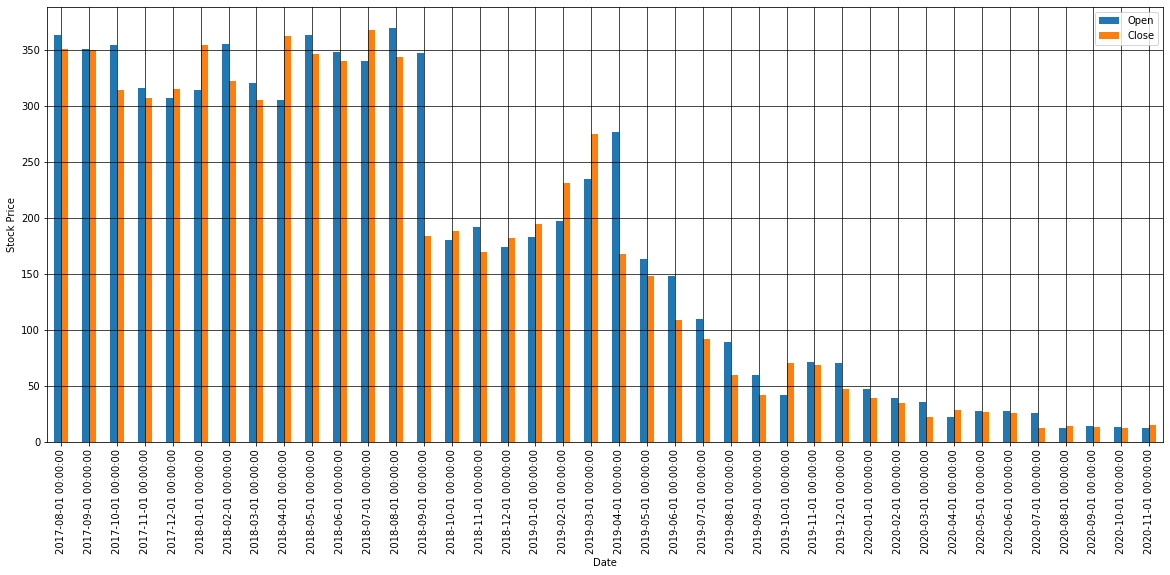

In [ ]:
# Chart - 3 visualization code
dataset[['Open','Close']].tail(40).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='black')
plt.ylabel("Stock Price")
plt.show()

##### 1. Why did you pick the specific chart?

The above chart shows a clear relation between the opening price and closing price.

Blue bar indicates opening price of that month, orange bar indicates closing price of that month. 

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can understand that 6 times opening price had reached its peak of above 350 Rs in the month of August 2017, September 2017, October 2017, February 2018, May 2018, August 2018.

The closing price reached its peak 4 times of above 350Rs, in the month of August 2017, January 2018, April 2018, July 2018.

The opening and closing prices were at lowest during these 4 months - August 2020, September 2020, October 2020, November 2020.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help in creating a positive business impact, by studying the chart we can understand that continuous 4 months in a row the price were at lowest i.e. from August 2020 to November 2020, this period can be avoided for investing.

#### Chart - 4

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '')

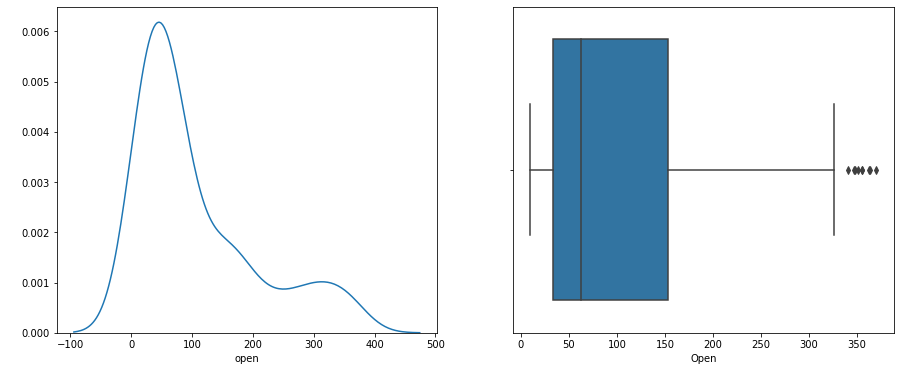

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.kdeplot(dataset['Open'])
fig.set_ylabel(' ')
fig.set_xlabel('open')

plt.subplot(1, 2, 2)
fig = sns.boxplot(dataset['Open'])
fig.set_title('')

##### 1. Why did you pick the specific chart?

Above chart was picked for density visualisation of the opening price and Visulazing outliers.

##### 2. What is/are the insight(s) found from the chart?

By understanding the density chart we can say that opening price was mostly in the range of 40Rs to 150Rs wit the peak at around 60Rs
The outliers are around 350Rs price range 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the density chart can help in creating a positive business impact, we can say that the stock in was around 40Rs to 150Rs most of the time and this could have been a good time to invest and was in 350Rs just a few times, so selling the stock at 350Rs range can be a good idea

#### Chart - 5

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '')

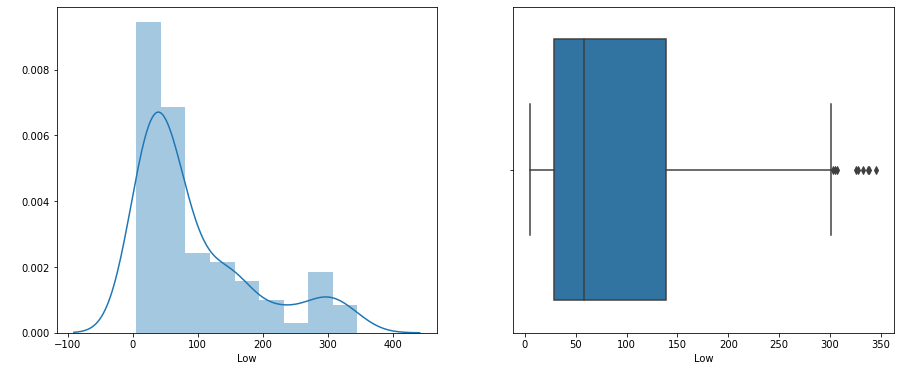

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(dataset['Low'])
fig.set_ylabel(' ')
fig.set_xlabel('Low')

plt.subplot(1, 2, 2)
fig = sns.boxplot(dataset['Low'])
fig.set_title('')

##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the lowest price of the month and Visulazing outliers.

##### 2. What is/are the insight(s) found from the chart?

By understanding the above chart we can say that density of YES BANK stock low price is at highest between 5Rs to 60Rs price range and the density keeps reducing after 100Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the density of low price of YES BANK stock price we can say that the chances of stock price closing between 5Rs to 60Rs is high and the chances of stock price closing higher than 100Rs is less

#### Chart - 6

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '')

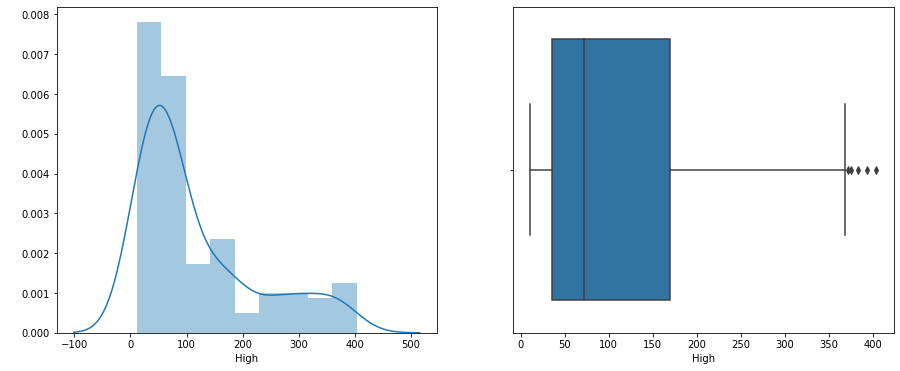

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(dataset['High'])
fig.set_ylabel(' ')
fig.set_xlabel('High')

plt.subplot(1, 2, 2)
fig = sns.boxplot(dataset['High'])
fig.set_title('')

##### 1. Why did you pick the specific chart?

Above chart was picked for better understanding of the density distribution visualisation of the highest price of the month and Visulazing outliers.

##### 2. What is/are the insight(s) found from the chart?

By understanding the above chart we can say that density of YES BANK stock high price is at highest between 5Rs to 60Rs price range and the density keeps reducing after 80Rs.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the density of high price of YES BANK stock price we can say that the chances of stock price reaching high between 5Rs to 60Rs is high and the chances of stock price closing higher than 100Rs is less

#### Chart - 7

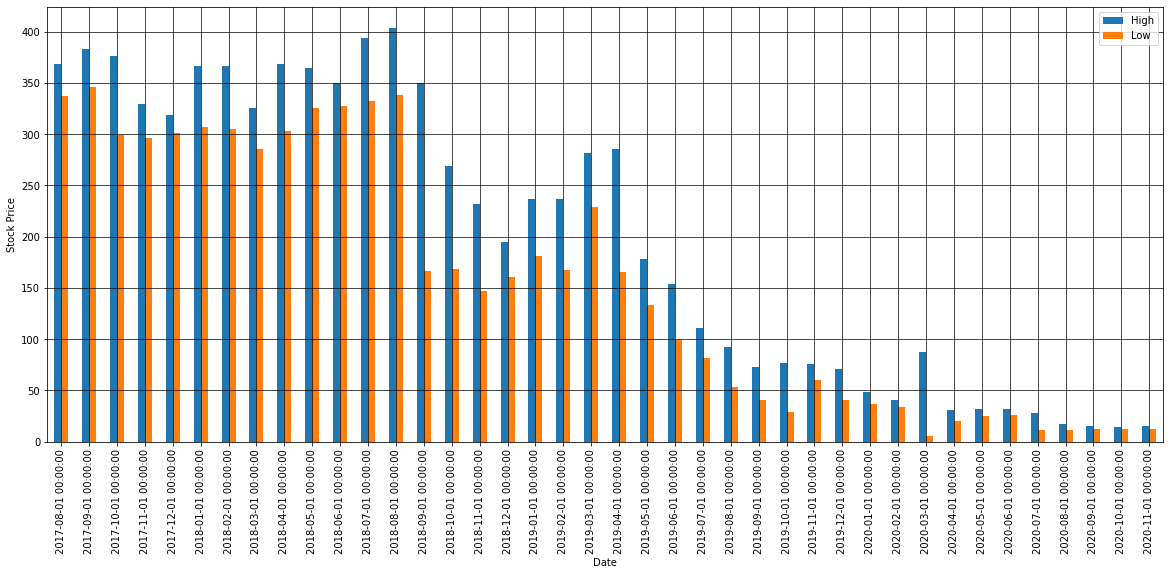

In [ ]:
# Chart - 7 visualization code
dataset[['High','Low']].tail(40).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='black')
plt.ylabel("Stock Price")
plt.show()

From the above chart we get the insights of the high and low prices of each month from 2017-2020

#### Chart - 8

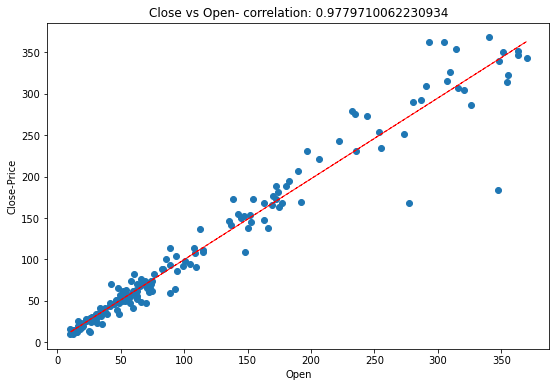

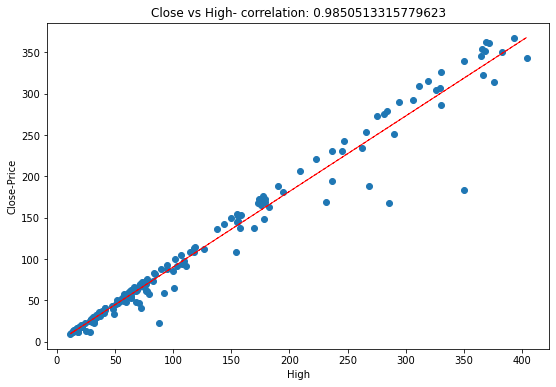

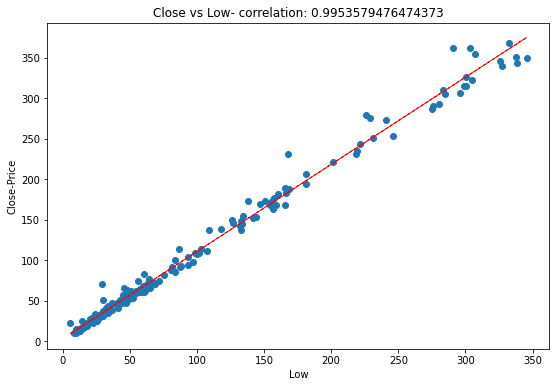

In [ ]:
# Chart - 8 visualization code
#scatter plot between dependent variable with all independent variables.
for col in Features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Close']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Close-Price')
    ax.set_title('Close vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Close'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

# Close-Open
Close-High
Close- Low
Here we selected 3 charts to understand the correlation between Close price and Open price, Close price and High price, Close price and Low price

##### 2. What is/are the insight(s) found from the chart?

All three charts show a positive correlation.
Close-Open chart has a correlation of 0.9779
Close-High chart has a correlation of 0.9850
Close-Low chart has a correlation of 0.9953
The chances of stock price closing at low are higher than compared to opening price

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insights can help with creating a positive business impact

We can say that Close-Low chart has the highest correlation of 0.9953, followed by Close-High chart has a correlation of 0.9850 and least is Close-Open chart has a correlation of 0.9779, if we would like to determine the closing price we can go by selecting the low price correlation as chances of stock price closing at low price is highest.

#### Chart - 9 - Correlation Heatmap

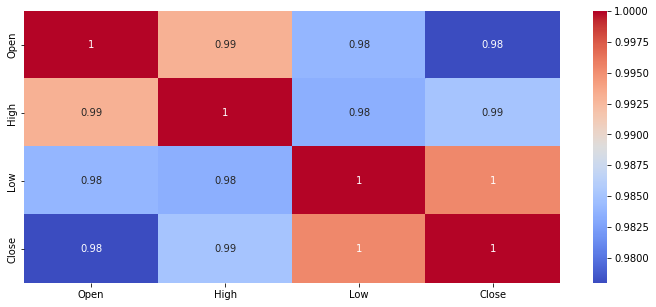

In [ ]:
# Correlation Heatmap visualization code
corr=dataset.corr()
plt.figure(figsize=(12,5))
sns.heatmap(corr, annot = True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

This chart was chosen to visualise the heat map between Close, Open, High, Low prices.

##### 2. What is/are the insight(s) found from the chart?

By understanding the chart we can say that the relation between low and close is the highest, followed by high and close, and least is open and close.

#### Chart - 11 - Pair Plot 

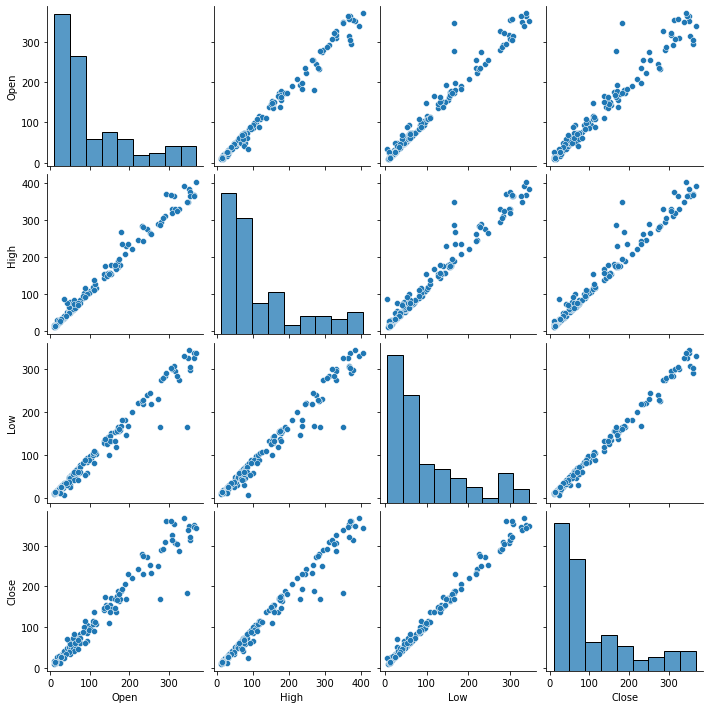

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

## ***5. Feature Engineering & Data Pre-processing***

### . Feature Manipulation & Selection

#### 1. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[independent_var])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


##### What all feature selection methods have you used  and why?

Variance Inflation Factor method

##### Which all features you found important and why?

Even though we have high VIF scores, we will not perform feature engineering because for this particular case as each feature is important. In the real world, most indicators take into account each of these features to predict future values.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

*Because* of the data being moderately right skewed we will be using log transformation for normal distribution. 

In [ ]:
#from scipy.stats import zscore
#Using Log transformation
independent_var = ['Open','High','Low']
x = np.log10(dataset[independent_var])

In [ ]:
y = np.log10(dataset['Close'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

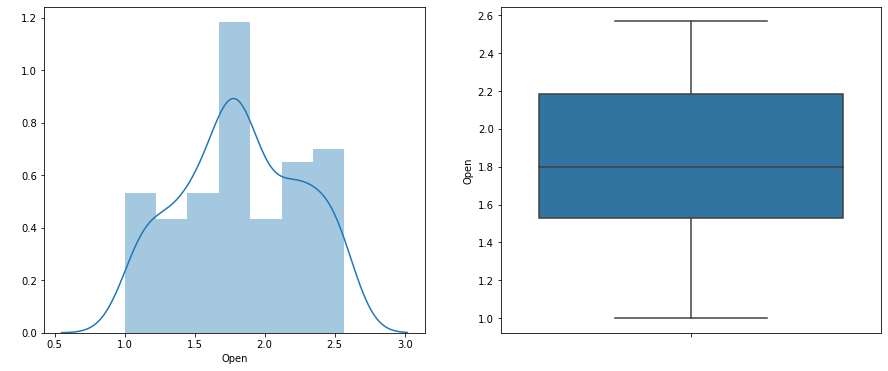

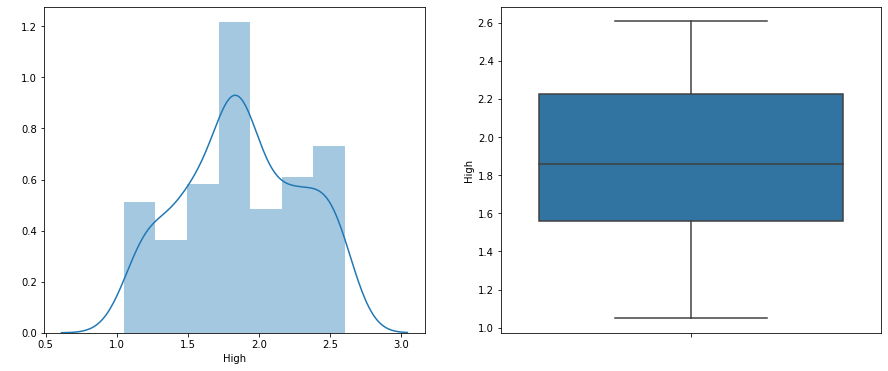

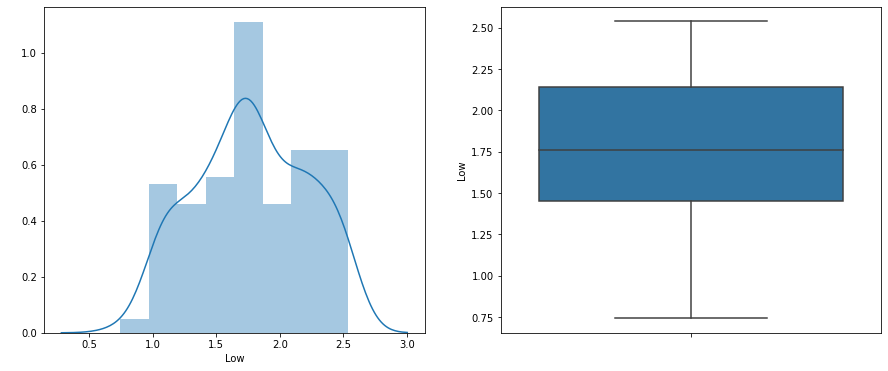

In [ ]:
# Transform Your data
for var in Features:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(dataset[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(dataset[var]))
    fig.set_title('')
    fig.set_ylabel(var)


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why? 

We used Train test split.
A split of 80-20 % is done on Trian and Test respectively, beacuse its considered to be optimum split.

## ***6. ML Model Implementation***

### ML Model - 1

Here we are using Linear Regression machine learning algorithm for building our model.It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent variable and one or more independent variables, thats why it is called as linear regression.

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
# Fit the Algorithm
reg = LinearRegression().fit(X_train, y_train)
# Predict on the model
reg.score(X_train, y_train)

0.9947900553430551

In [ ]:
reg.coef_

array([-0.54870728,  0.82607147,  0.72696515])

In [ ]:

y_pred = reg.predict(X_test)

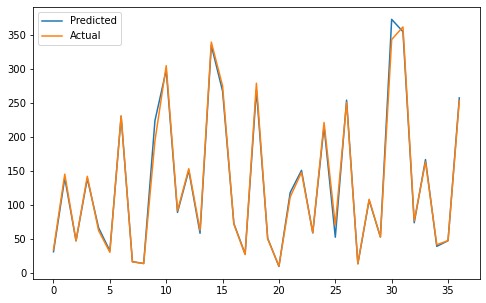

In [ ]:

plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 70.4204061614549
RMSE : 8.391686729225235
R2 : 0.9937436908107393
Adjusted R2 :  0.9931749354298974


### ML Model - 2 Using Lasso Regression 

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.6790589204250228

In [ ]:
y_pred_l = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8552.042520593579
RMSE : 92.47725407143953
R2 : 0.24021707449589957
Adjusted R2 :  0.1711458994500723


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso_1 = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)
# Fit the Algorithm

# Predict on the model

GridSearchCV(cv=3, estimator=Lasso(alpha=0.1, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

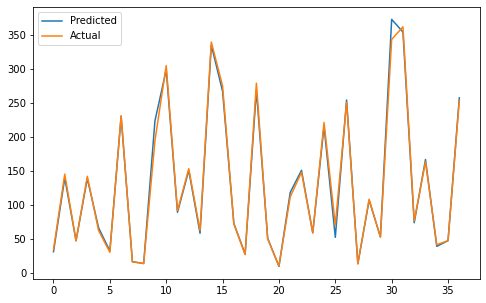

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used Cross validation and hyper parameter tuning for avoiding overfiting of the model lasso and better accuracy on test data. 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Not much improvement is seen beacuse of the less accuracy than our first model.

### ML Model - 3 Using Ridge Regression

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)
# Fit the Algorithm
ridge.fit(X_train,y_train)
print(ridge.score(X_train, y_train))
# Predict on the model
y_pred_r = ridge.predict(X_test)

0.9937372031772778


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 84.54874728831831
RMSE : 9.195039276061756
R2 : 0.9924884968230997
Adjusted R2 :  0.9918056328979269


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0013085591570528594


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

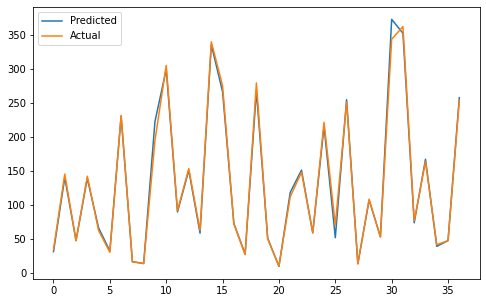

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

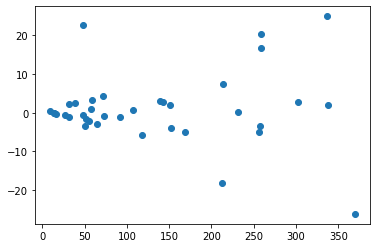

In [ ]:

### Heteroscadacity
plt.scatter(10**(y_pred_r),10**(y_test)-10**(y_pred_r))

In [ ]:
10**(y_pred)

array([ 30.99022321, 139.52578767,  47.20003592, 138.76152873,
        66.37639853,  32.206864  , 230.16454023,  16.42303081,
        13.71334173, 224.1008932 , 298.51460785,  88.88870295,
       150.66523923,  58.19270977, 334.91417497, 267.4982992 ,
        72.58931932,  27.6478609 , 269.36866298,  50.86829167,
         9.36641666, 118.27864101, 150.80557678,  58.74722774,
       215.69416746,  52.38597016, 254.18932917,  13.25902053,
       106.83558252,  52.83631572, 373.11141493, 355.02808635,
        73.66401224, 166.69688337,  38.94179495,  47.31812705,
       257.53151773])

In [ ]:
10**(y_test)

Date
2008-04-01     34.06
2015-12-01    145.23
2019-12-01     46.95
2014-11-01    142.08
2010-08-01     62.22
2007-01-01     30.16
2016-12-01    231.26
2006-02-01     16.12
2005-12-01     13.71
2019-01-01    194.30
2018-03-01    304.90
2019-07-01     91.30
2015-11-01    153.30
2011-06-01     62.38
2018-06-01    339.60
2019-03-01    275.05
2010-10-01     71.86
2008-08-01     26.83
2017-01-01    279.10
2010-01-01     49.84
2009-03-01      9.98
2014-09-01    111.70
2019-05-01    147.95
2010-07-01     58.99
2016-06-01    221.30
2019-10-01     70.45
2016-09-01    250.85
2005-11-01     13.41
2014-07-01    108.21
2011-01-01     52.59
2018-08-01    343.40
2017-07-01    361.96
2012-09-01     76.44
2015-03-01    163.31
2007-09-01     41.36
2010-02-01     47.32
2016-10-01    253.52
Name: Close, dtype: float64

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We choose our first and third model that is simple linear regression model and ridge regression model for final prediction because of good prediction accuracy than lasso and least mean squared error and good scores of evalution metrics.

# **Summary & Conclusion**

At first we do the data wrangling then data cleaning and data transformation after that we do the Modeling part.

In EDA part we conclude from our dataset that:
Stock's closing price decreased after year 2018 which was mainly because of Rana Kapoor case and hit the stock price badly.
The graph for Yes BANK opening price and closing price has same result.
The point that the stock price of the YES BANK falls down after the year 2018 and it is not beneficial for investors to invest their money.
From scatter plot we can conclude that bivariate analysis shows high correlation of close price with other features.
All histogram plot shows that all are right skewed.
For data transformation we used Log Transformation because it was moderately right skewed.
From heatmap we can conclude that all the features showing high correlation between each other.
We implemented linear regression and the accuracy of our linear regression model is 99.78%.

After that we visualise the performance of our linear regression model and the graph shows that we achieve the almost best fit model for our dataset